### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation


AveragePrice - the average price of a single avocado


type - conventional or organic


year - the year


Region - the city or region of the observation


Total Volume - Total number of avocados sold


4046 - Total number of avocados with PLU 4046 sold


4225 - Total number of avocados with PLU 4225 sold


4770 - Total number of avocados with PLU 4770 sold


#### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

#### Task: One of Classification and other of Regression



#### Impoting the required libraries



In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv(r'Avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


After viewing the content in our dataset found that there is column 'Unnamed' & no mean to keep that column into our dataset .so we need to drop it and As per the given statement this is very clear that columns Average price is our label which is in continous form we need to build some Regrssion model.

#### Exploratory Data Analysis (EDA)

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(18249, 13)

Basic outlook of the Data

In [5]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

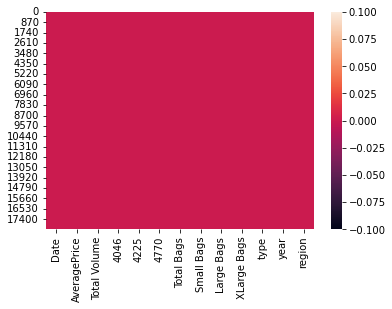

In [6]:
sns.heatmap(df.isnull())

we can see that there is no any null_value present in the any columns of our datasets.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


from this method we can see the type of data we are having in our dataset as per requirement we need to treat them


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


Uisng the describe method in transpose format we are able to see information about numerical columns since object data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

In [9]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement



In [11]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

We have split column 'Date' into three new column namely Year,month,day .



In [12]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [13]:
df.drop(['year','Date'],axis=1,inplace=True)

In [14]:
df.shape

(18249, 14)

In [15]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


we have dropped 'year'&'Date' as they are already in our dataset and we dont want any duplicacy




### Visualization

#### Univariate Analysis



conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

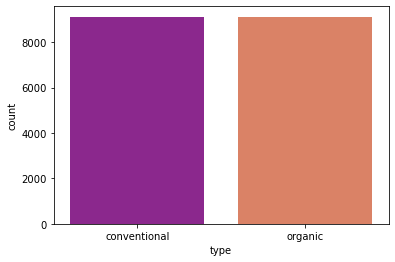

In [16]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

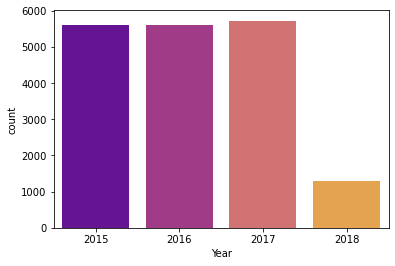

In [17]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

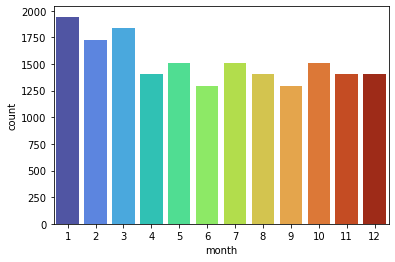

In [18]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='turbo')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

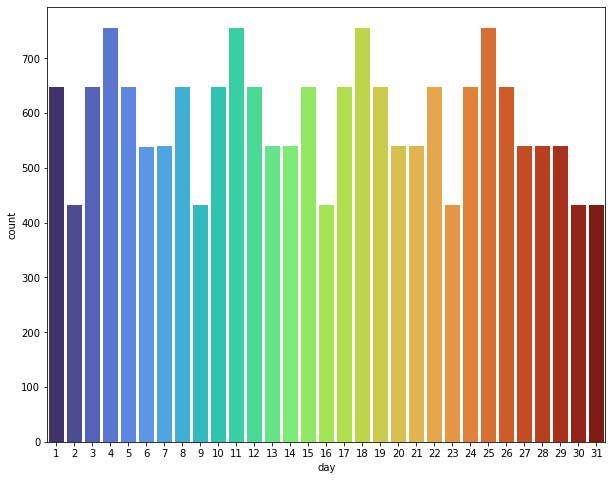

In [19]:
print(df['day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df,palette='turbo')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

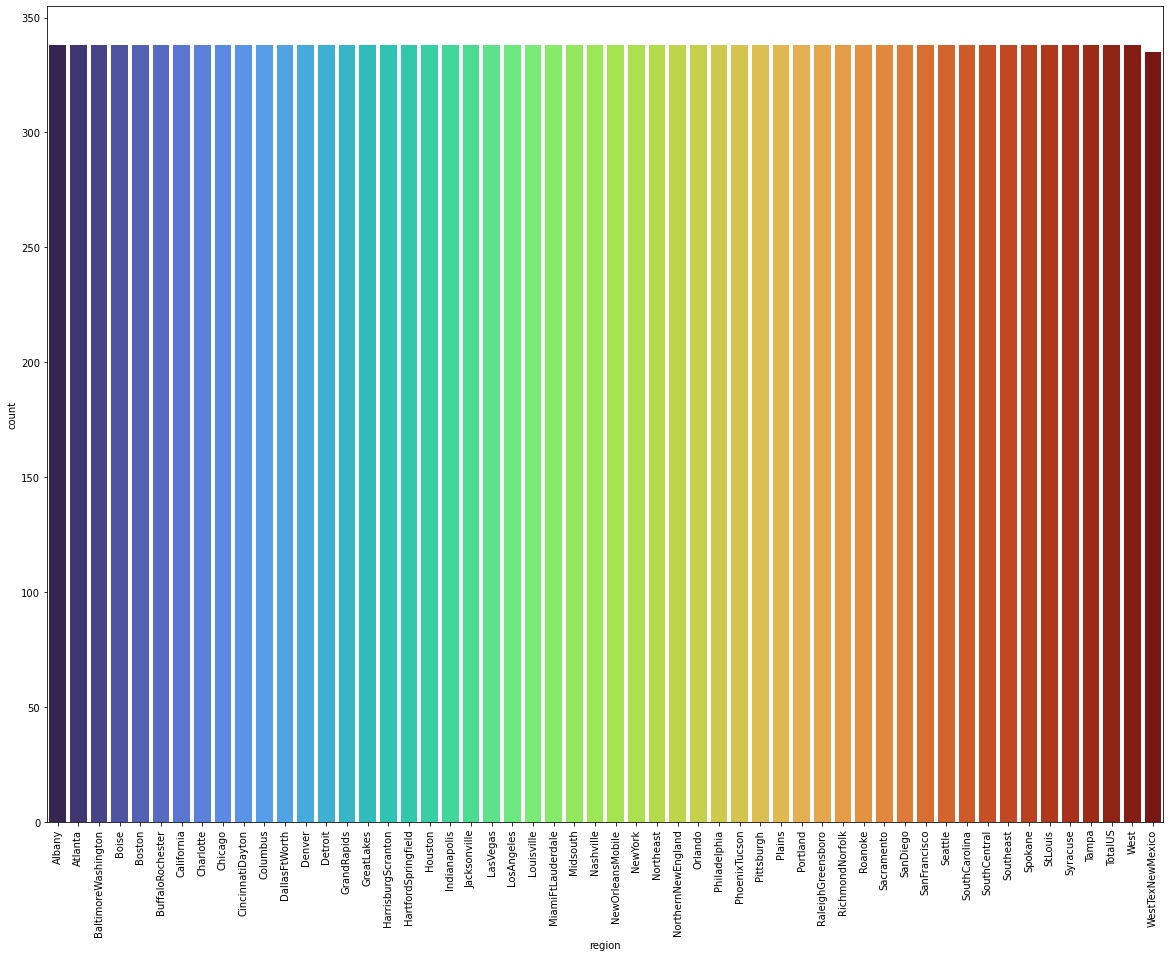

In [20]:
print(df['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df,palette='turbo')
plt.xticks(rotation=90)
plt.show()

#### Bivariate Analysis



<Figure size 1080x720 with 0 Axes>

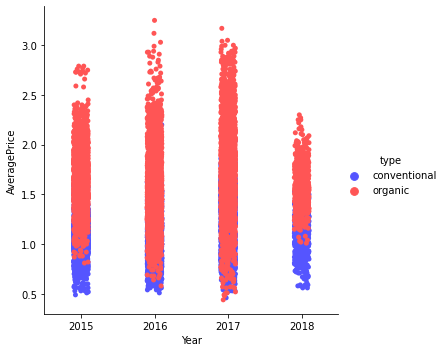

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

with the help of this catplot we can see that how organic Average price more than conventional year after year



<Figure size 1080x720 with 0 Axes>

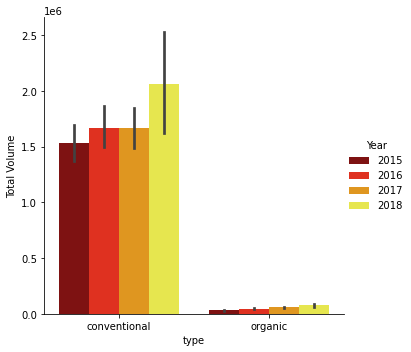

In [22]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="hot")
plt.show()

this plot is clearly displaying that Totla volume of conventional type every time higher than organic tyep



<Figure size 1080x720 with 0 Axes>

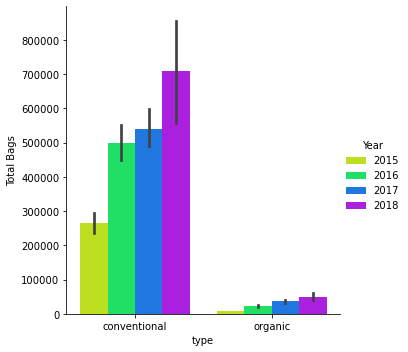

In [23]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

this show that Total Bags of conventional type has always been higher than organic type



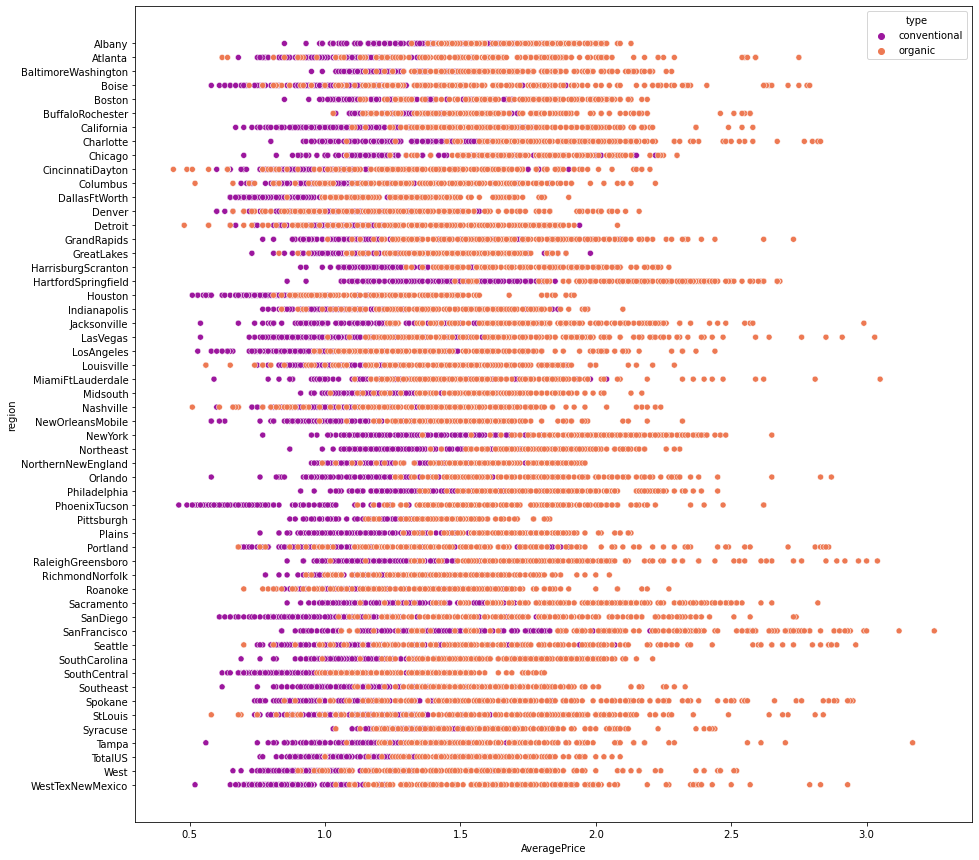

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")
plt.show()

by the help of this scatterplot we can say that the Average Price of every Region of organic type is always higher than that of conventional.



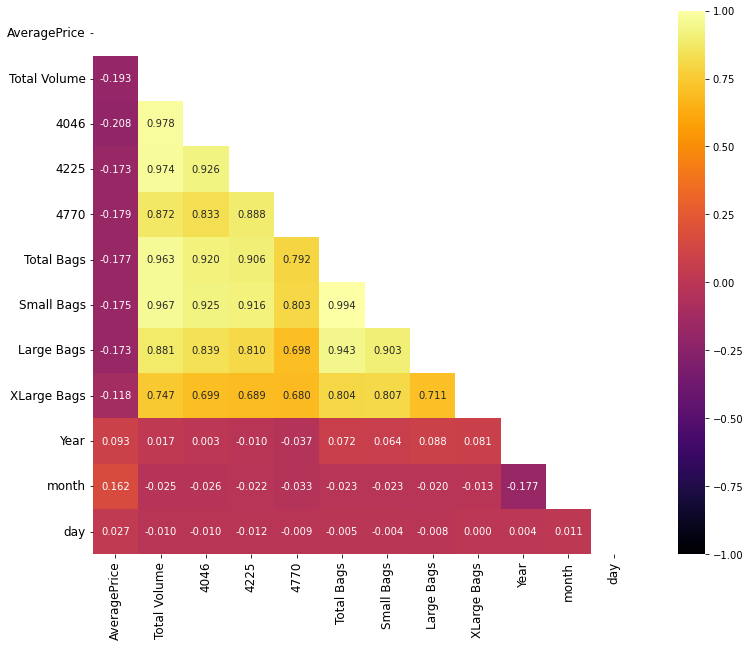

In [25]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


As heatmap of correlation of our dataset df is displaying that many of columns are highly correleted to each other means columns like, 4046,4225,4770 are highly correlated with Total Volume in this case we have to drop these columns ,similarly small Bags,Large Bags and Xlarge Bags are highly correleted with Totla Bags these columns also needs to be dropped in order to secure from multicollearnity problems

In [26]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [27]:
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,2018,1,14


#### Encoding


In [28]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


with the help of ordinalEncoder we have changed some object data to numric data as machine learning dont processed with object type data



#### outliers


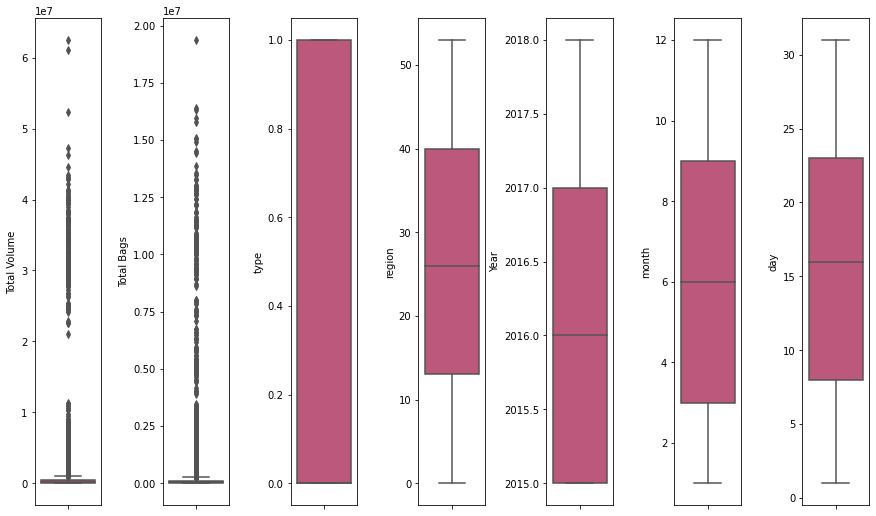

In [29]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

with the help of this boxplot we can see that there are some outlier present in features 'Total Volume' and 'Total Bags' that is need to be treated in next step



In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [31]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
df.shape,df_new.shape,
(18249-17931)/18249*100

1.7425612362321221

#### skewness


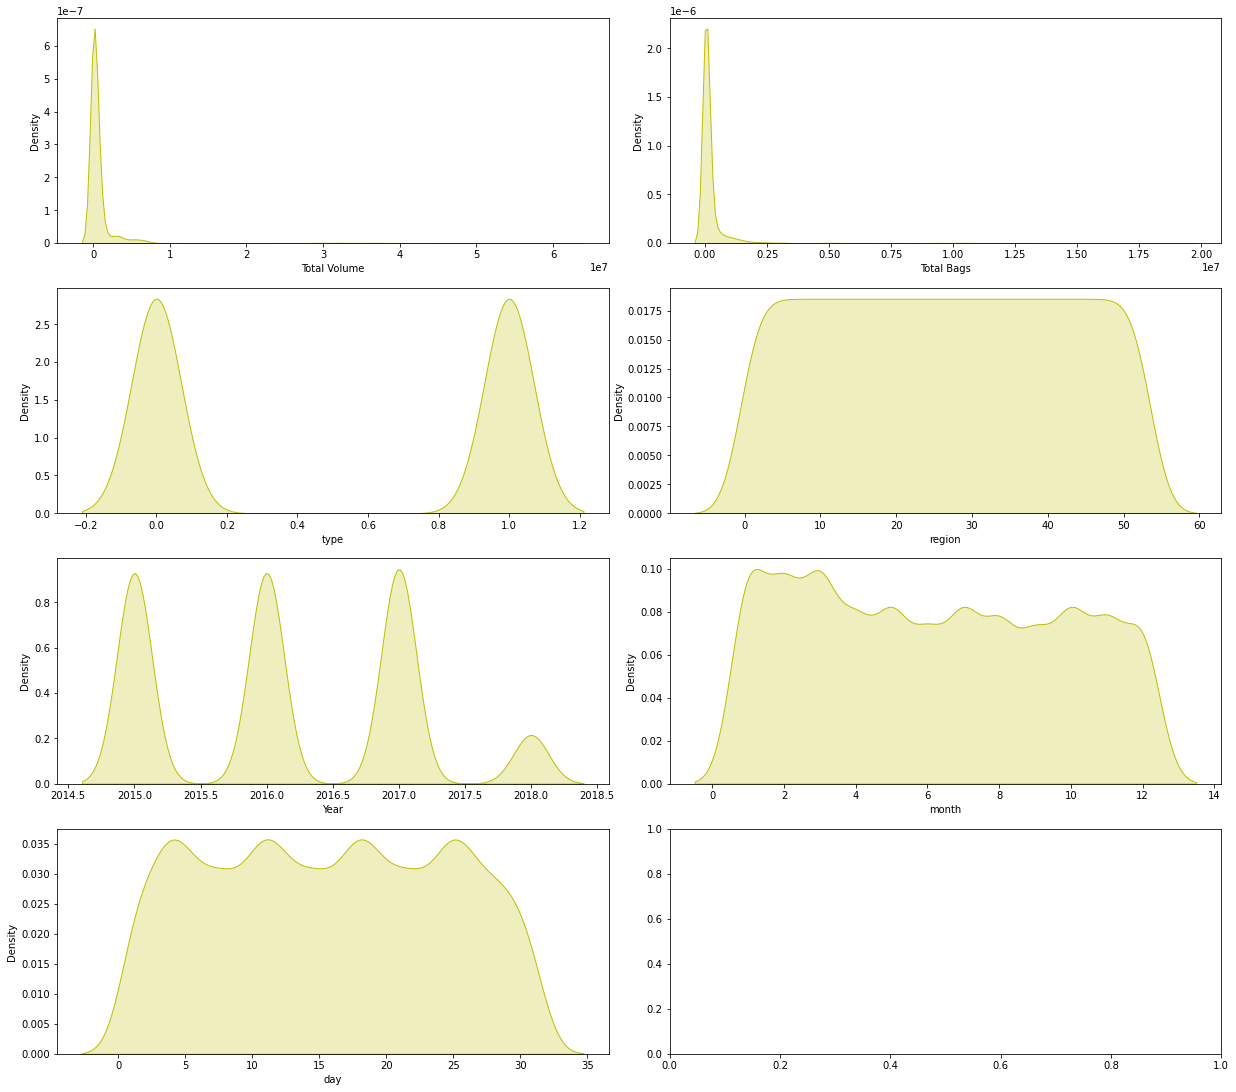

In [34]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

#### Using LogTransform method to fix the skewness


In [35]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
     df[col]=np.log1p(df[col])

In [36]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

#### Splitting Data into Two parts namely X and Y


In [37]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

#### Feature Scaling


In [38]:
scale=StandardScaler()

In [39]:
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)

In [40]:
x

,Total Volume,Total Bags,type,region,Year,month,day
0,-0.107282,-0.494074,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.175949,-0.454761,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.158690,-0.523041,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.207558,-0.644845,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.775077,-0.466102,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.778901,-0.459975,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.707798,-0.391424,1.000164,1.700811,1.970504,-1.464959,-0.189449


#### Finding best random state to build Regression Model


In [41]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5154450113185596 on Random State 672


#### Train_test_split


In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)

#### Machine Learning Model for Regression and Evaluation metrics


In [43]:
def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)

In [44]:
model=LinearRegression()
reg(model,x,y)

mean square error 0.013474534166490987
r2_score -2.0916269978194624
cv score  14.36245355516392
final score = -16.454080552983385


In [45]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.0030095448335652236
r2_score 86.64819489813443
cv score  10.998319532671927
final score = 75.6498753654625


In [46]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.012539510686425944
r2_score -0.3708618750364101
cv score  10.358759421598766
final score = -10.729621296635177


In [47]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.009186826366427658
r2_score 47.2897212157402
cv score  -20.27721910485175
final score = 67.56694032059195


In [48]:
#dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.005815827846847308
r2_score 79.03411648879245
cv score  -16.88044793329675
final score = 95.9145644220892


In [49]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.013474675702694469
r2_score -2.1119659503896715
cv score  14.365774566244848
final score = -16.47774051663452


In [50]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.027812853228557987
r2_score -2.2564467257114354e+32
cv score  -103.77105535400972
final score = -2.2564467257114354e+32


In [51]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.002715167855261281
r2_score 88.53691830582878
cv score  43.44985609350638
final score = 45.0870622123224


#### Hyper parameter tuning for best ML model


In [52]:
#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [53]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [54]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [55]:
GSCV.best_score_

0.5780035823390738

In [56]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -2}

hence, here gridsearchcv has provided us best detail of our best model


In [57]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.3928301016917


i have finally done hyper parameter tuning with my best Ml model and having r2 value .



In [58]:
filename='final_model-02'
joblib.dump(Final_Model,filename)

['final_model-02']

finally saving best regression model by the help of joblib library



#### ThankYou!!!